# Whelks and lobsters -- context operator

## The system

In [1]:
R.<x,y> = QQ[]

In [2]:
from ulbc import *

In [3]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = [RIF(1,1.2), RIF(4,6)]

In [4]:
v3 = [RIF(1,1.1), RIF(4,5)]

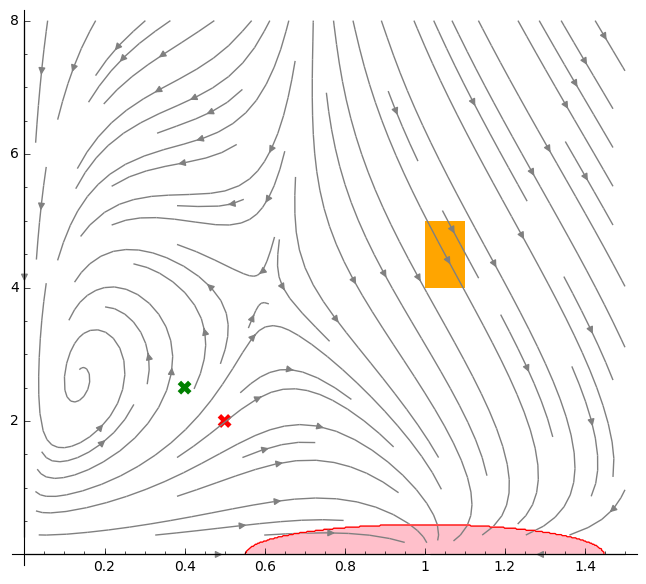

In [5]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

## Simple signal

In [6]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

Computed 501 flowpipes in 1.49929308891 sec
Prepared for plotting in 0.787442922592 sec
domain = [0.00000000000000000 .. 5.0000000000000009]
roots = [[1.4278780504788686 .. 2.6199999999999993]]
  J  = [0.00000000000000000 .. 1.4278780504788687]
f(J) = [-0.30143396690182523 .. 25.180516586224702]
  J  = [2.6199999999999992 .. 5.0000000000000009]
f(J) = [-0.35271263287245075 .. 0.085166001459252100]
Monitored signal 0.151206254959 sec


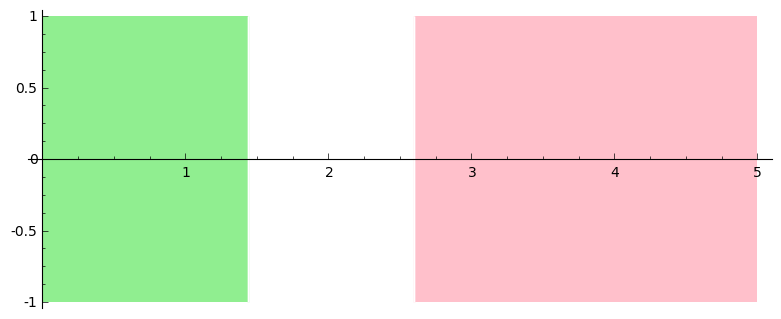

In [7]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5)
sig.plot()

Computed 501 flowpipes in 1.56914710999 sec
Prepared for plotting in 0.811601638794 sec
domain = [0.00000000000000000 .. 5.0000000000000009]
roots = [[1.6679767143790633 .. 1.6699999999999796], 
 [1.6741848470338891 .. 2.3199999999999870]]
  J  = [0.00000000000000000 .. 1.6679767143790634]
f(J) = [-0.45374930218095023 .. 25.180516586224702]
  J  = [1.6699999999999795 .. 1.6741848470338892]
f(J) = [-0.13465014631767772 .. 0.70870216053617264]
  J  = [2.3199999999999869 .. 5.0000000000000009]
f(J) = [-0.38483994948820572 .. 0.20154112898465460]
Monitored signal 0.620689153671 sec


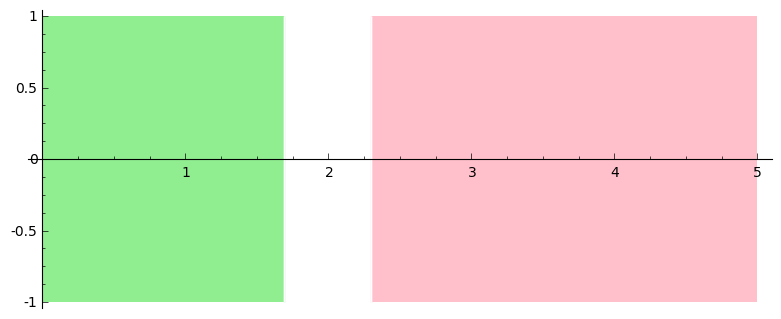

In [8]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True)
sig.plot()

Computed 66 flowpipes in 0.262483119965 sec
Prepared for plotting in 0.149636745453 sec
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[1.3916968009236800 .. 1.4520731300894437], 
 [1.5148129129113103 .. 1.5184870921717835], 
 [1.5670945148659656 .. 2.3236493583492060]]
  J  = [0.00000000000000000 .. 1.3916968009236801]
f(J) = [-0.28162083067297273 .. 25.183405123894769]
  J  = [1.4520731300894436 .. 1.5148129129113104]
f(J) = [-0.088094735983783118 .. 1.2157236100563989]
  J  = [1.5184870921717834 .. 1.5670945148659657]
f(J) = [-0.10686431021187754 .. 1.0494941567509926]
  J  = [2.3236493583492059 .. 5.0000000000000000]
f(J) = [-0.38008279631511733 .. 0.19787675805213754]
Monitored signal 0.0971939563751 sec


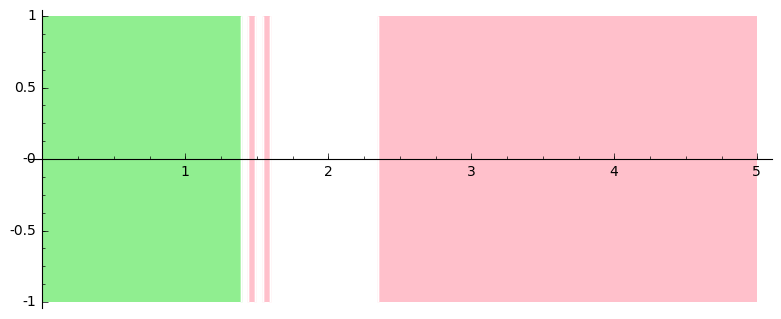

In [9]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True,
                    verbosity=3)
sig.plot()

Computed 66 flowpipes in 0.307599306107 sec
Prepared for plotting in 0.148054838181 sec
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[0.10343750000000001 .. 0.76510436099420421], 
 [2.4878883481319027 .. 3.0546524239379834]]
  J  = [0.00000000000000000 .. 0.10343750000000002]
f(J) = [-0.15000118745448177 .. -0.0050948730237294626]
  J  = [0.76510436099420420 .. 2.4878883481319028]
f(J) = [0.00081812236518552516 .. 0.23331653224762694]
  J  = [3.0546524239379833 .. 4.9999999999999992]
f(J) = [-0.11440814829967195 .. 0.0013367637732706328]
Monitored signal 0.0247600078583 sec


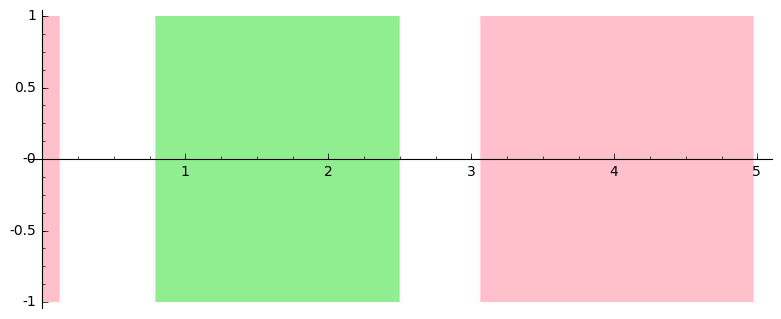

In [10]:
sig2 = Atomic(x - 1.15).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5)
sig2.plot()

Computed 66 flowpipes in 0.277470350266 sec
Prepared for plotting in 0.150698661804 sec
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[0.10633378976545118 .. 0.73619713464944559], 
 [2.5906952982047264 .. 2.9719646571903074]]
  J  = [0.00000000000000000 .. 0.10633378976545119]
f(J) = [-0.15000118745448177 .. -0.0039173498573150666]
  J  = [0.73619713464944558 .. 2.5906952982047265]
f(J) = [-0.0058481814200814775 .. 0.23331653224762694]
  J  = [2.9719646571903073 .. 4.9999999999999992]
f(J) = [-0.11440814829967195 .. 0.0061857555040394364]
Monitored signal 0.0233571529388 sec


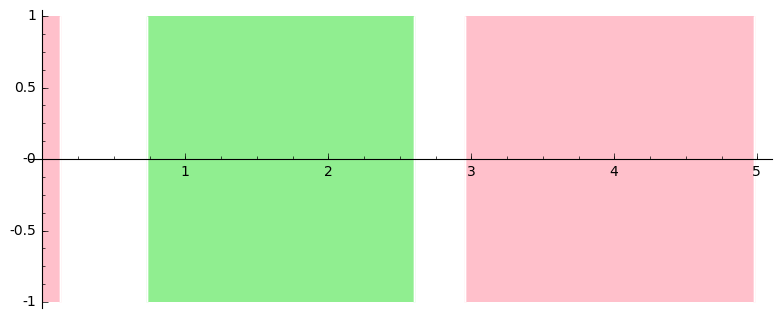

In [11]:
sig2 = Atomic(x - 1.15).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
sig2.plot()

In [12]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7)

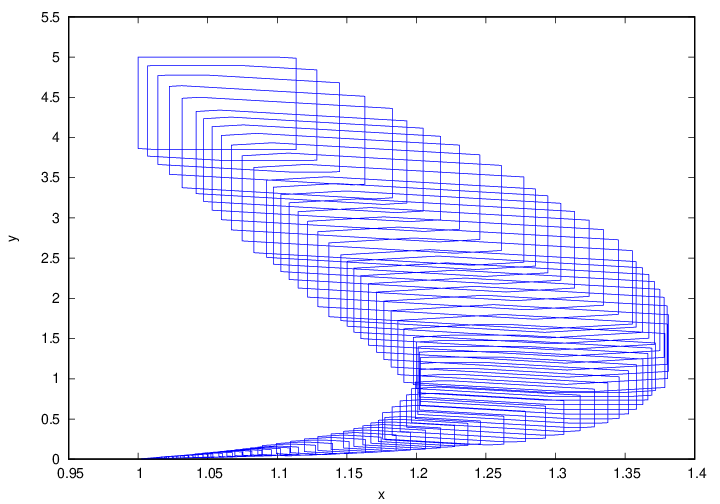

In [13]:
reach.wplot('x', 'y')

### Polynomial plot

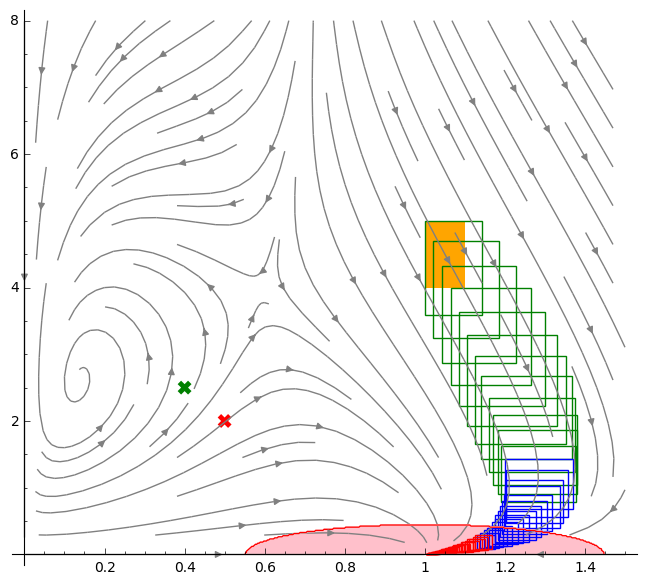

In [14]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

In [15]:
reach.symbolic_composition = True

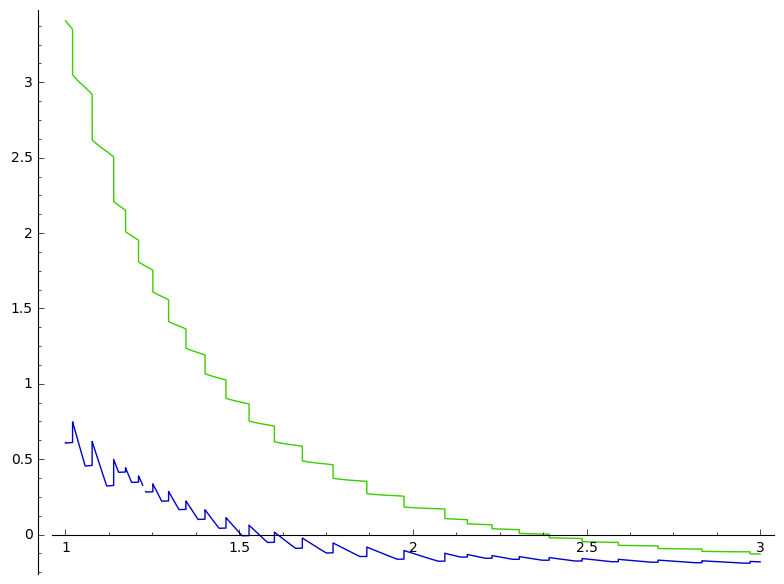

In [16]:
p1 = reach.sage_plot((x - 1)^2 + y^2 - 0.2, (1, 3))
p1

In [79]:
roots = reach.roots(P.p, P.dpdt(vf), verbosity=10)

reached detect roots t=0.0 + [0.0..0.03125]
reached detect roots t=0.03125 + [0.0..0.034375]
reached detect roots t=0.065625 + [0.0..0.0378125]
reached detect roots t=0.1034375 + [0.0..0.04159375]
reached detect roots t=0.14503125 + [0.0..0.045753125]
reached detect roots t=0.190784375 + [0.0..0.02516421875]
reached detect roots t=0.21594859375 + [0.0..0.027680640625]
reached detect roots t=0.243629234375 + [0.0..0.0304487046875]
reached detect roots t=0.274077939063 + [0.0..0.0334935751563]
reached detect roots t=0.307571514219 + [0.0..0.0368429326719]
reached detect roots t=0.344414446891 + [0.0..0.0405272259391]
reached detect roots t=0.38494167283 + [0.0..0.044579948533]
reached detect roots t=0.429521621363 + [0.0..0.0245189716931]
reached detect roots t=0.454040593056 + [0.0..0.0269708688624]
reached detect roots t=0.481011461918 + [0.0..0.0296679557487]
reached detect roots t=0.510679417667 + [0.0..0.0326347513236]
reached detect roots t=0.54331416899 + [0.0..0.0358982264559]
re

limit_output extension: Maximum message size of 10000 exceeded with 15176 characters

In [20]:
[root.str(style='brackets') for root in roots]

['[1.5148465335853966 .. 1.5184870921717833]',
 '[1.5670202576799081 .. 2.3824775508894818]']

In [21]:
reach.symbolic_composition = False

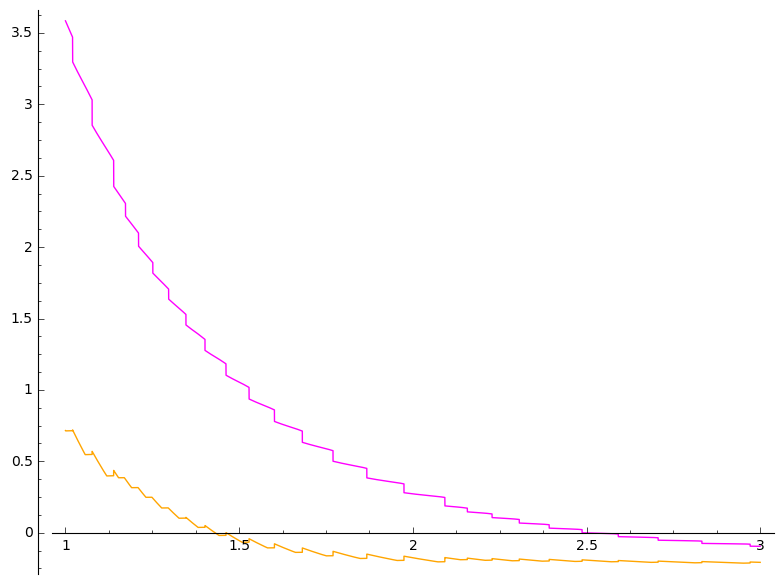

In [23]:
p2 = reach.sage_plot((x - 1)^2 + y^2 - 0.2, (1, 3),
                     color=['orange', 'magenta'])
p2

In [24]:
roots = reach.roots(P.p, P.dpdt(vf))

In [25]:
[root.str(style='brackets') for root in roots]

['[1.4390681573910157 .. 2.4772209432575254]']

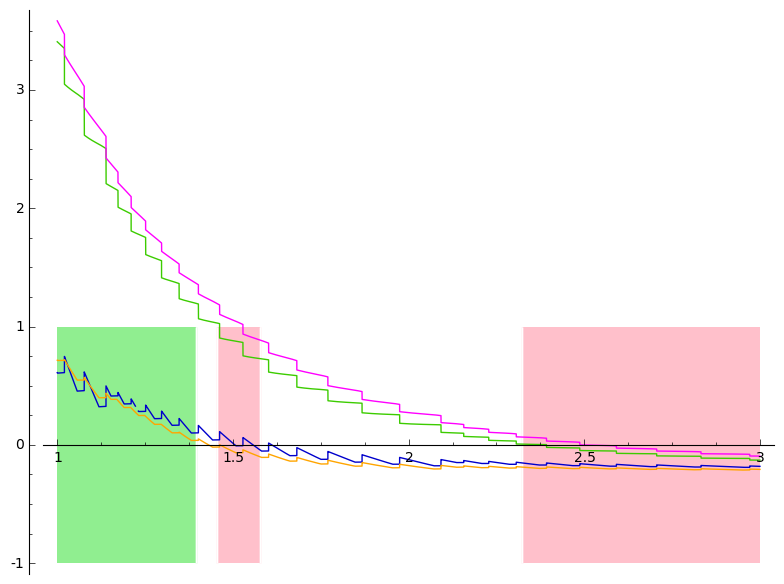

In [32]:
p1 + p2 + sig.to_domain(RIF(1, 3)).plot(aspect_ratio='automatic')

### $x \ge 1.15$

In [38]:
q = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: x - 1.15 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
q.set_aspect_ratio(1/6)

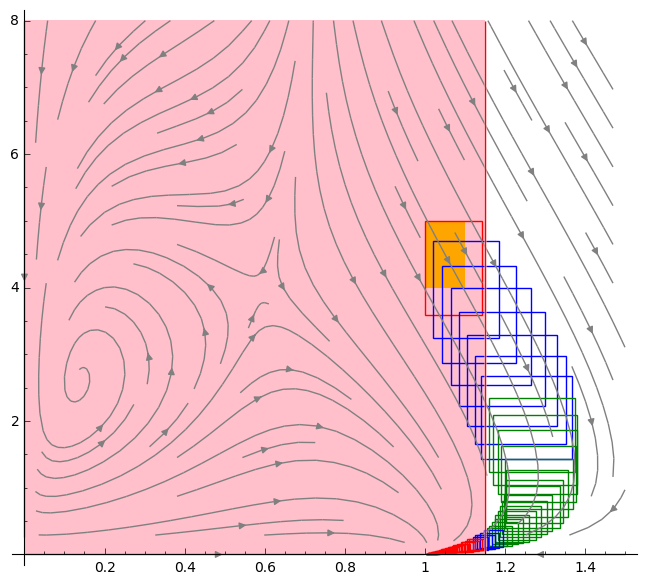

In [39]:
q + reach.sage_interval_plot('x', 'y',
                             poly=x - 1.15,
                             aspect_ratio='automatic')

In [70]:
reach.symbolic_composition = True

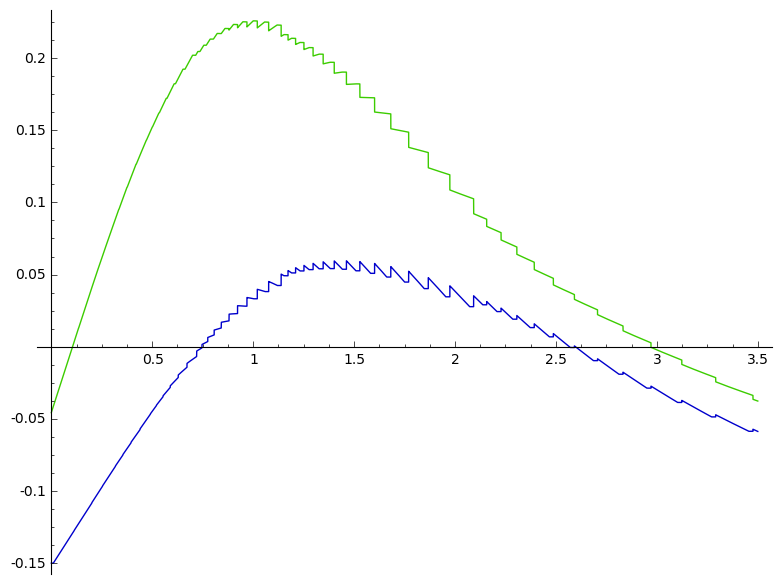

In [71]:
q1 = reach.sage_plot(x - 1.15, (0, 3.5))
q1

In [72]:
roots = reach.roots(P.p, P.dpdt(vf))

In [73]:
[root.str(style='brackets') for root in roots]

['[1.5148465335854002 .. 1.5184870921717868]',
 '[1.5670202576799117 .. 2.3824775508894854]']

In [74]:
reach.symbolic_composition = False

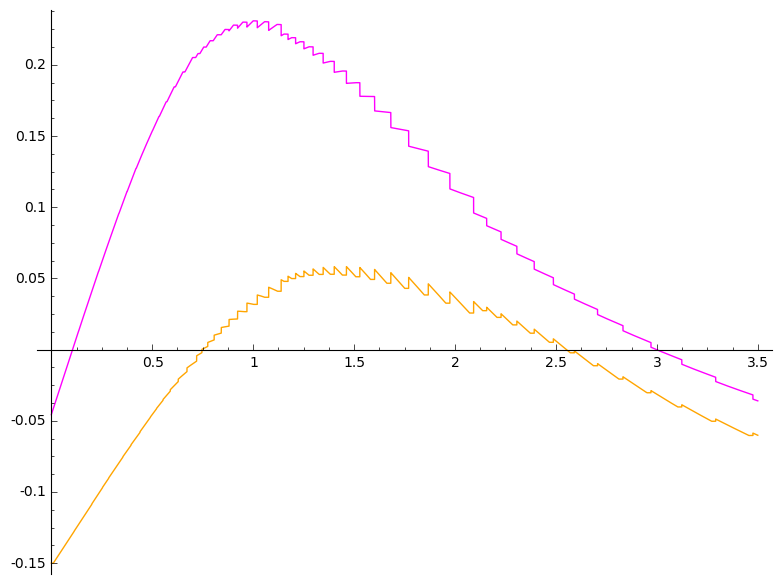

In [75]:
q2 = reach.sage_plot(x - 1.15, (0, 3.5),
                     color=['orange', 'magenta'])
q2

In [76]:
roots = reach.roots(P.p, P.dpdt(vf))

In [77]:
[root.str(style='brackets') for root in roots]

['[1.4390681573910157 .. 2.4772209432575254]']

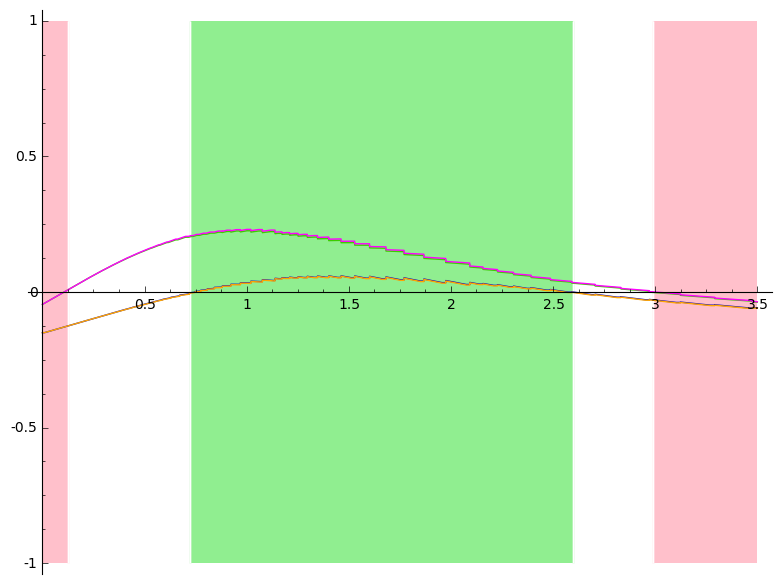

In [78]:
q1 + q2 + sig2.to_domain(RIF(0, 3.5)).plot(aspect_ratio='automatic')

## Context

In [ ]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=10,
    epsilon_ctx=0.1
)
args = (vf, v3, 7)

In [ ]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

In [ ]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

### Diagnostics

In [ ]:
reach = Reach(vf, v3, 7 + 1e-3, **kwargs)

In [ ]:
reach.num_flowpipes

In [ ]:
m = reach(RIF(0, 1) + 0.0)

In [ ]:
print('[{}]'.format(", \n ".join(a.str(style='brackets') for a in m)))

In [ ]:
fm = Poly((x - 1)^2 + y^2 - 0.2)(m)
fm

In [ ]:
fm.str(style='brackets')

In [ ]:
Q = {x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

In [ ]:
[a.str(style='brackets') for a in Q.context_jump(m)]

In [ ]:
Poly((x - 1)^2 + y^2 - 0.2)(Q.context_jump(m)).str(style='brackets')

In [ ]:
sig = G(RIF(0,0.2), P).signal_for_system(vf, Q.context_jump(m), 0, **kwargs)
sig

In [ ]:
sig = P.signal_for_system(vf, Q.context_jump(m), 0.2, **kwargs)
sigd

In [ ]:
rt = RIF(0.00000000000000000, 0.035150739702498699)

In [ ]:
reach2 = Reach(vf, Q.context_jump(m), 1, **kwargs)

In [ ]:
rts = reach2.roots(P.p, P.dpdt(vf), epsilon=1e-5, verbosity=10)

In [ ]:
[a.str(style='brackets') for a in rts]

In [ ]:
Poly((x - 1)^2 + y^2 - 0.2)(reach2(rt.center())).str(style='brackets')

In [ ]:
reach2.num_flowpipes

### Sage eval vs flow* intEval

In [ ]:
from flowstar.poly import Poly, index_fn

In [ ]:
plot((lambda t: Poly(P.p)(reach2(t)).lower(),
      lambda t: Poly(P.p)(reach2(t)).upper(),
      lambda t: index_fn(P.p)(reach2(t)).lower(),
      lambda t: index_fn(P.p)(reach2(t)).upper()),
     (0, 1))

In [ ]:
plot(((lambda t: index_fn(P.p)(reach2(t)).lower()),
      (lambda t: Poly(P.p)(reach2(t)).lower())),
      #lambda t: index_fn((x - 1)^2 + y^2 - 0.2)(reach2(t)).upper()),
     (0, 0.05), plot_points=1000)\
 + point((rts[0].lower(), 0), marker='X', size=100, color='red')
# + point((rts[0].upper(), 0), marker='X', size=100, color='green')

In [ ]:
import scipy.optimize as opti

In [ ]:
opti.minimize_scalar((lambda t: abs(Poly(P.p)(reach2(t)).lower())), (0, float(0.01)))

In [ ]:
opti.minimize_scalar((lambda t: abs(index_fn(P.p)(reach2(t)).lower())), (0, float(0.01)))

### More manual tests

In [ ]:
reach2.result

In [ ]:
jm = Q.context_jump(m)

In [ ]:
p + polygon([(m[0].lower(), m[1].lower()), (m[0].upper(), m[1].lower()), (m[0].upper(), m[1].upper()), (m[0].lower(), m[1].upper())], aspect_ratio='automatic', fill=None, color='orange') + polygon([(jm[0].lower(), jm[1].lower()), (jm[0].upper(), jm[1].lower()), (jm[0].upper(), jm[1].upper()), (jm[0].lower(), jm[1].upper())], aspect_ratio='automatic', fill=None, color='magenta') + reach2.sage_interval_plot('x', 'y', poly=(x - 1)^2 + y^2 - 0.2, aspect_ratio='automatic')

In [ ]:
sig(0)

In [ ]:
sig = G(RIF(0,0.2), P).signal_for_system(vf, Q.context_jump(m), 2, **kwargs)
sig